**Generating Synthetic Data**

First, we'll simulate a dataset of counts from a Poisson distribution with a specified true rate parameter $\lambda_{true}$.

*Parameters:*

*   True Rate ($\lambda_{true}$): The actual rate at which events occur.

* Number of Observations ($n$): The size of the dataset.

In [1]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# True rate parameter
lambda_true = 5

# Number of observations
n = 50

# Generate synthetic data from a Poisson distribution
synthetic_data = np.random.poisson(lam=lambda_true, size=n)

print("Synthetic Data:", synthetic_data)
print("Total Counts:", synthetic_data.sum())

Synthetic Data: [ 5  4  4  5  5  3  5  4  6  7  2  5  5  6  4  6  6  1  7  2 11  4  3  8
  3  3  5  8  3  2  5  3  8 10  3  2  5  7  6  6  2  4  9  7 11  8  3  2
  3  4]
Total Counts: 250


**Defining the Gamma Prior**

Next, we'll define the Gamma prior distribution for $\lambda$ with initial parameters $\alpha$ = 2 and $\beta$ = 2.

*Gamma Prior Parameters:*

Shape Parameter ($\alpha$): Controls the shape of the distribution.

Rate Parameter ($\beta$): Controls the rate at which events occur.

In [2]:
# Prior parameters
alpha_prior = 2
beta_prior = 2

print(f"Prior Gamma Parameters: alpha = {alpha_prior}, beta = {beta_prior}")

Prior Gamma Parameters: alpha = 2, beta = 2


**Updating the Prior Parameters**

In [3]:
# Sum of observed counts
sum_x = synthetic_data.sum()

# Update posterior parameters
alpha_post = alpha_prior + sum_x
beta_post = beta_prior + n

print(f"Posterior Gamma Parameters: alpha = {alpha_post}, beta = {beta_post}")

Posterior Gamma Parameters: alpha = 252, beta = 52


**Python Function for Updating Posterior Parameters**

In [4]:
def update_posterior_gamma_poisson(data, alpha_prior, beta_prior):
    """
    Updates the posterior Gamma distribution parameters for λ given Poisson-distributed data.

    Parameters:
    - data (array-like): Observed counts from a Poisson distribution.
    - alpha_prior (float): Shape parameter of the Gamma prior.
    - beta_prior (float): Rate parameter of the Gamma prior.

    Returns:
    - alpha_post (float): Updated shape parameter of the Gamma posterior.
    - beta_post (float): Updated rate parameter of the Gamma posterior.
    """
    # Ensure data is a NumPy array for efficient computation
    data = np.array(data)

    # Number of observations
    n = len(data)

    # Sum of observed counts
    sum_x = data.sum()

    # Update posterior parameters
    alpha_post = alpha_prior + sum_x
    beta_post = beta_prior + n

    return alpha_post, beta_post


**Using the Function**

In [5]:
# Update posterior using the function
alpha_post_func, beta_post_func = update_posterior_gamma_poisson(
    data=synthetic_data,
    alpha_prior=alpha_prior,
    beta_prior=beta_prior
)

print(f"Posterior Gamma Parameters (Function): alpha = {alpha_post_func}, beta = {beta_post_func}")


Posterior Gamma Parameters (Function): alpha = 252, beta = 52


**Plotting Prior and Posterior Distributions**

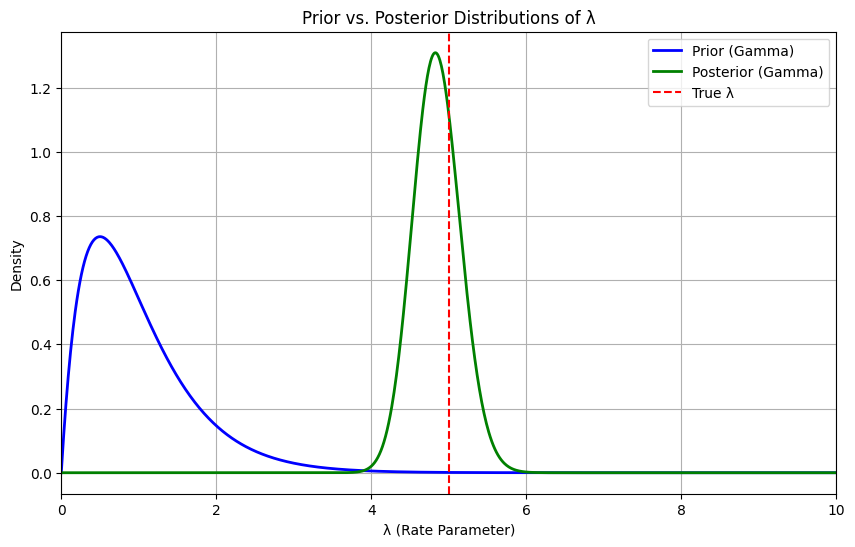

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define the prior parameters
alpha_prior = 2
beta_prior = 2

# Define the posterior parameters from previous simulation
alpha_post = 252
beta_post = 52

# True lambda used to generate data
lambda_true = 5

# Generate a range of lambda values
lambda_values = np.linspace(0, 10, 1000)

# Compute the prior and posterior PDFs
prior_pdf = gamma.pdf(lambda_values, a=alpha_prior, scale=1/beta_prior)
posterior_pdf = gamma.pdf(lambda_values, a=alpha_post, scale=1/beta_post)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, prior_pdf, label='Prior (Gamma)', color='blue', lw=2)
plt.plot(lambda_values, posterior_pdf, label='Posterior (Gamma)', color='green', lw=2)
plt.axvline(lambda_true, color='red', linestyle='--', label='True λ')
plt.title('Prior vs. Posterior Distributions of λ')
plt.xlabel('λ (Rate Parameter)')
plt.ylabel('Density')
plt.xlim(0, 10)
plt.legend()
plt.grid(True)
plt.show()


**Posterior Concentration with Increasing Data**

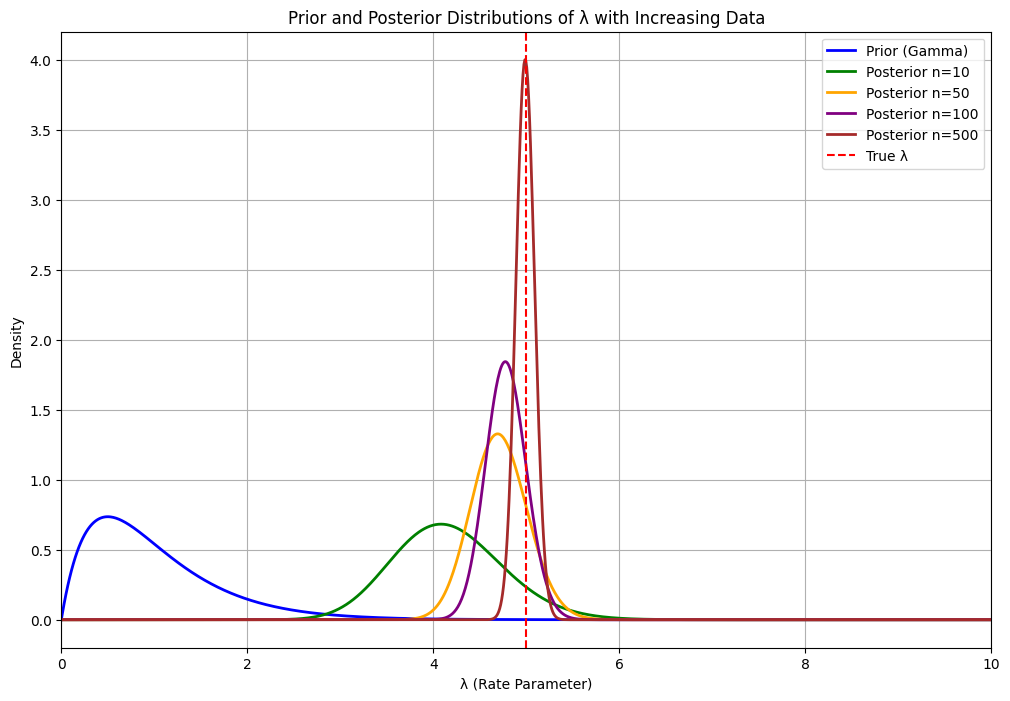

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

def update_posterior_gamma_poisson(data, alpha_prior, beta_prior):
    """
    Updates the posterior Gamma distribution parameters for λ given Poisson-distributed data.
    """
    data = np.array(data)
    n = len(data)
    sum_x = data.sum()
    alpha_post = alpha_prior + sum_x
    beta_post = beta_prior + n
    return alpha_post, beta_post

# Set seed for reproducibility
np.random.seed(42)

# True rate parameter
lambda_true = 5

# Prior parameters
alpha_prior = 2
beta_prior = 2

# Define sample sizes to simulate
sample_sizes = [10, 50, 100, 500]

# Generate a range of lambda values for plotting
lambda_values = np.linspace(0, 10, 1000)

# Compute the prior PDF
prior_pdf = gamma.pdf(lambda_values, a=alpha_prior, scale=1/beta_prior)

# Initialize the plot
plt.figure(figsize=(12, 8))
plt.plot(lambda_values, prior_pdf, label='Prior (Gamma)', color='blue', lw=2)

# Colors for different sample sizes
colors = ['green', 'orange', 'purple', 'brown']

# Iterate over different sample sizes
for idx, n in enumerate(sample_sizes):
    # Generate synthetic data
    synthetic_data = np.random.poisson(lam=lambda_true, size=n)

    # Update posterior parameters
    alpha_post, beta_post = update_posterior_gamma_poisson(synthetic_data, alpha_prior, beta_prior)

    # Compute posterior PDF
    posterior_pdf = gamma.pdf(lambda_values, a=alpha_post, scale=1/beta_post)

    # Plot posterior
    plt.plot(lambda_values, posterior_pdf, label=f'Posterior n={n}', color=colors[idx], lw=2)

# Plot the true lambda
plt.axvline(lambda_true, color='red', linestyle='--', label='True λ')

# Final plot adjustments
plt.title('Prior and Posterior Distributions of λ with Increasing Data')
plt.xlabel('λ (Rate Parameter)')
plt.ylabel('Density')
plt.xlim(0, 10)
plt.legend()
plt.grid(True)
plt.show()
